In [235]:
import pandas as pd
import numpy as np

In [236]:
df = pd.read_csv("../data/Week2_Retail Store.csv")
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [237]:
df.shape

(12575, 11)

In [238]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [240]:
# df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])
# df["Transaction Date"].dtype

## DATA CLEANING

In [241]:
df.isna().sum() / len(df) * 100

Transaction ID       0.000000
Customer ID          0.000000
Category             0.000000
Item                 9.646123
Price Per Unit       4.842942
Quantity             4.803181
Total Spent          4.803181
Payment Method       0.000000
Location             0.000000
Transaction Date     0.000000
Discount Applied    33.391650
dtype: float64

In [242]:
df["Item"] = df["Item"].fillna("Unknown")
df["Item"].isna().sum()

np.int64(0)

In [243]:
df = df.dropna(subset=["Price Per Unit", "Quantity", "Total Spent"])
df.isna().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                   0
Price Per Unit         0
Quantity               0
Total Spent            0
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    3783
dtype: int64

In [244]:
df["Discount Applied"] = df["Discount Applied"].fillna(False)
df.isna().sum()

C:\Users\oktax\AppData\Local\Temp\ipykernel_1116\3497144184.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Discount Applied"] = df["Discount Applied"].fillna(False)


Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

## Melakukan agregasi dan visualisasi

In [245]:
import matplotlib.pyplot as plt

## 1. Nilai Total Belanja per Pelanggan
Insight yang Didapat: Kamu bisa langsung melihat siapa pelanggan yang paling banyak menghabiskan uang di tokomu. Ini sangat berguna untuk program loyalitas, marketing khusus, atau memberikan penawaran spesial kepada pelanggan VIP.

- Nilai Tertinggi: CUST_24 (64,608.0)
- Nilai Terendah: CUST_17 (53,790.5)

In [246]:
total_spending_per_customer = df.groupby("Customer ID")["Total Spent"].agg("sum")
total_spending_per_customer

Customer ID
CUST_01    55908.0
CUST_02    59512.5
CUST_03    57150.0
CUST_04    57959.0
CUST_05    63855.5
CUST_06    56020.0
CUST_07    57084.5
CUST_08    62850.5
CUST_09    57113.0
CUST_10    60367.5
CUST_11    57449.5
CUST_12    58478.5
CUST_13    63015.5
CUST_14    58076.5
CUST_15    60749.5
CUST_16    63185.5
CUST_17    53790.5
CUST_18    55454.5
CUST_19    57559.0
CUST_20    58241.0
CUST_21    59639.0
CUST_22    59460.0
CUST_23    59738.5
CUST_24    64608.0
CUST_25    55732.5
Name: Total Spent, dtype: float64

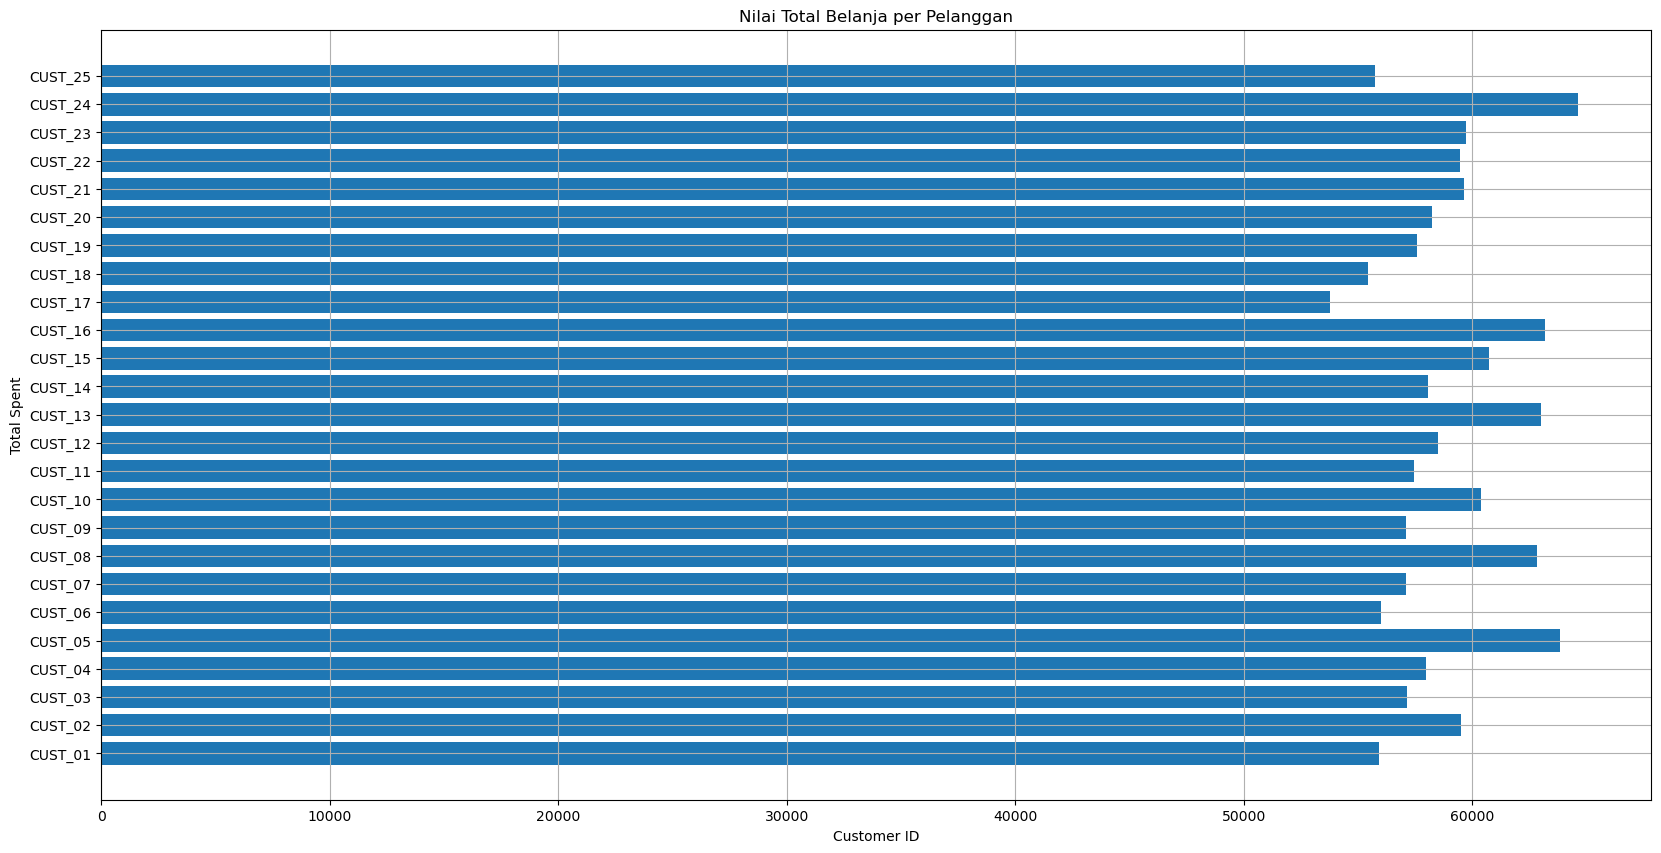

In [247]:
plt.figure(figsize=(20, 10))
plt.barh(total_spending_per_customer.index,  total_spending_per_customer.values)
plt.title("Nilai Total Belanja per Pelanggan")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent")
plt.grid(True)

## 2. Performa Penjualan per Lokasi
Insight: Menemukan lokasi dengan penjualan tertinggi dan terendah, berguna untuk keputusan bisnis terkait ekspansi, penutupan, atau alokasi sumber daya.

- "Penjualan melalui kanal online menunjukkan performa yang lebih tinggi dibandingkan penjualan di in-store, dengan total penjualan mencapai Rp749.431,0, unggul sekitar Rp25.863,5 dari penjualan in-store."

In [248]:
sales_performance_per_location = df.groupby("Location")["Total Spent"].agg("sum")
sales_performance_per_location

Location
In-store    723567.5
Online      749431.0
Name: Total Spent, dtype: float64

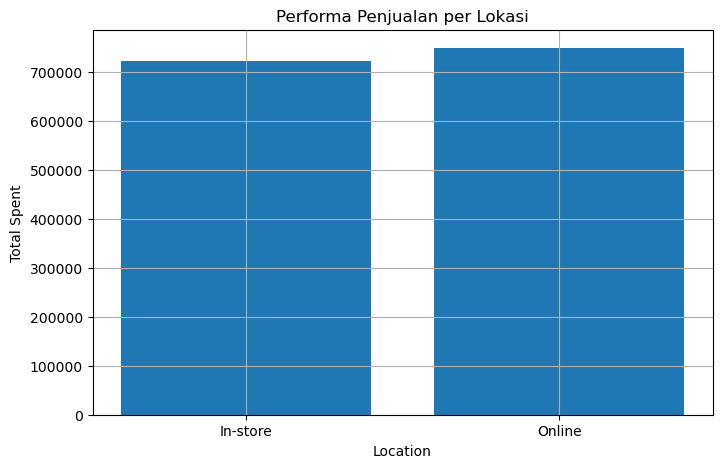

In [249]:
plt.figure(figsize=(8, 5))
plt.bar(sales_performance_per_location.index, sales_performance_per_location.values)
plt.title("Performa Penjualan per Lokasi")
plt.xlabel("Location")
plt.ylabel("Total Spent")
plt.grid(True)

## 3. Total Pendapatan per Kategori Produk
Tujuan Agregasi: Mengetahui kategori produk mana yang paling banyak menghasilkan pendapatan.

- Disini produk yang paling banyak menghasilkan pendapatan ialah `Butchers (197426.0)`

In [250]:
product_category_revenue = df.groupby("Category")["Total Spent"].agg("sum")
product_category_revenue

Category
Beverages                             187978.5
Butchers                              197426.0
Computers and electric accessories    180902.5
Electric household essentials         192441.5
Food                                  184645.0
Furniture                             186527.0
Milk Products                         170747.5
Patisserie                            172330.5
Name: Total Spent, dtype: float64

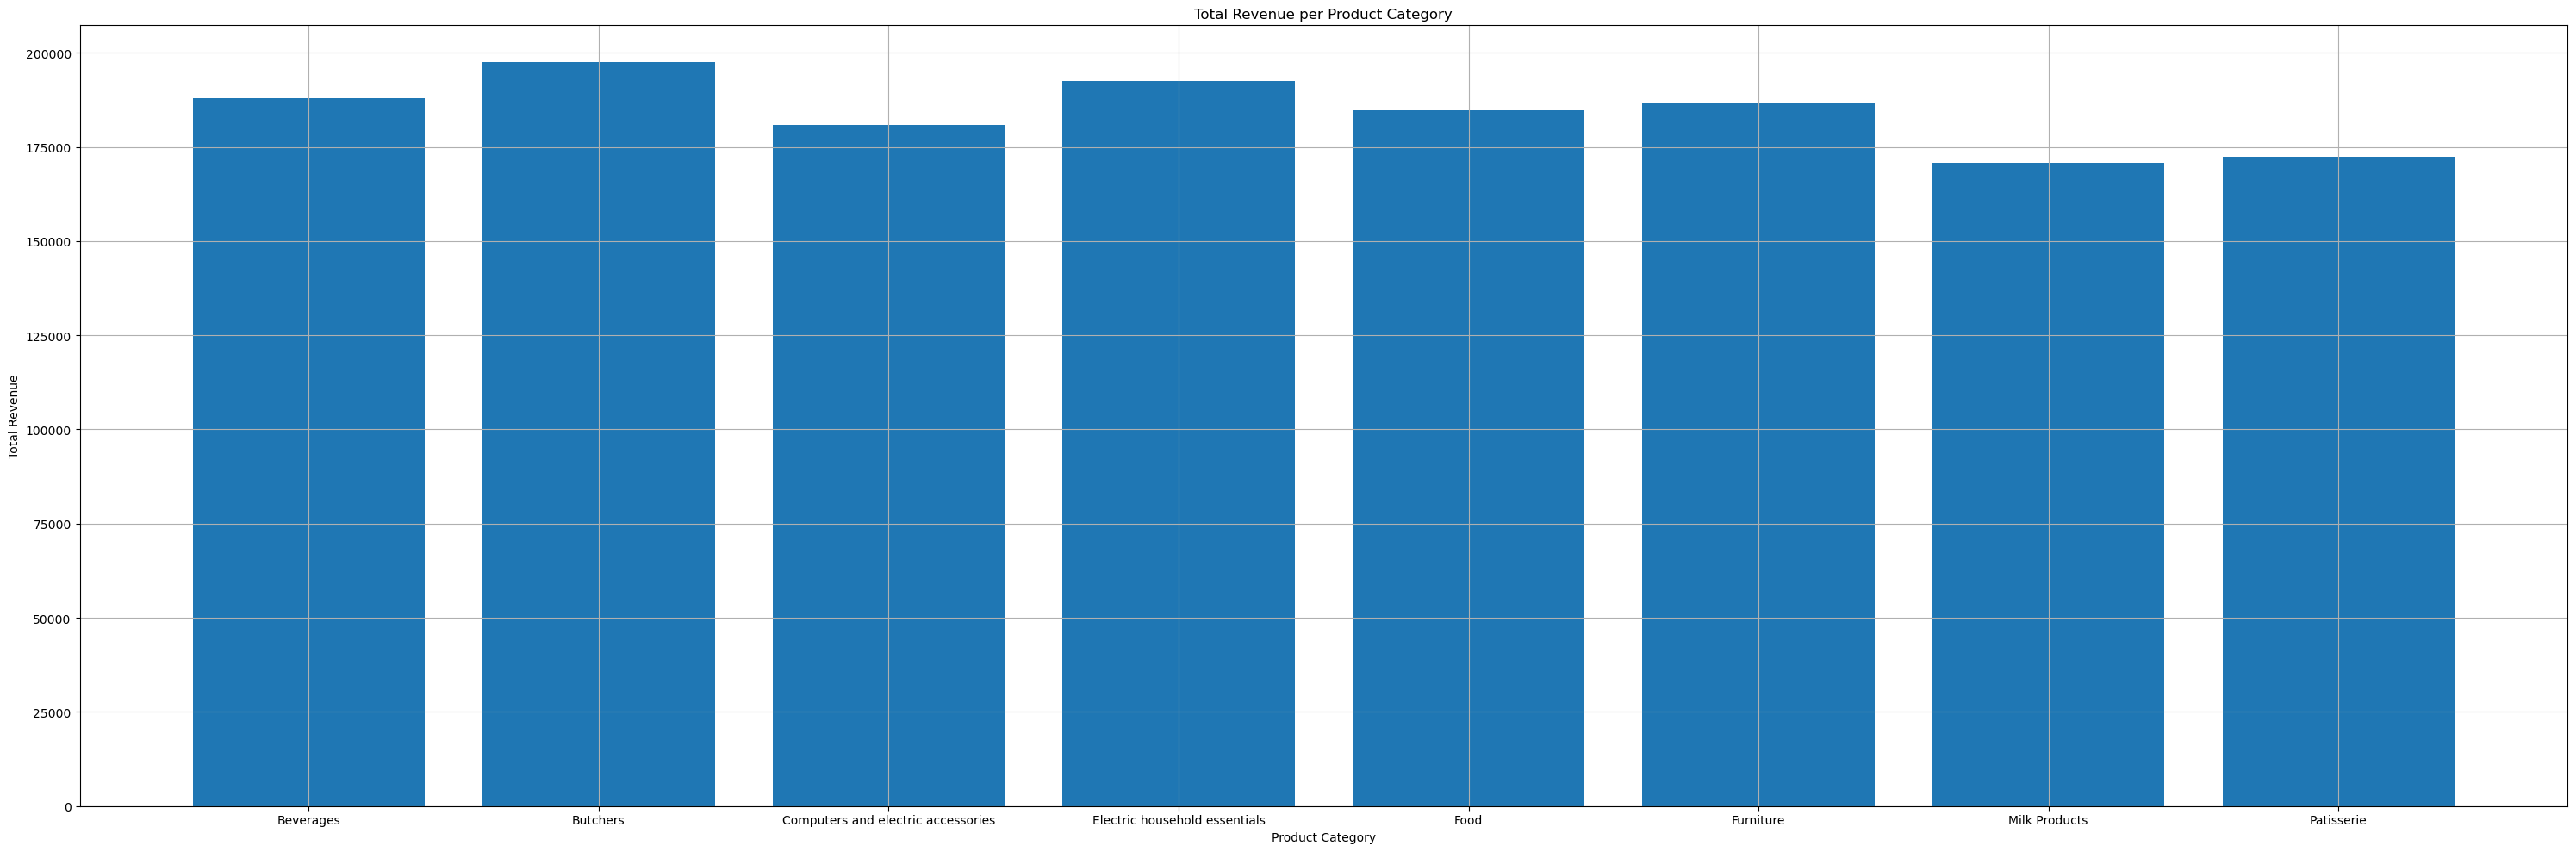

In [251]:
plt.figure(figsize=(30, 10))
plt.bar(product_category_revenue.index, product_category_revenue.values)
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.title("Total Revenue per Product Category")
plt.tight_layout()
plt.grid(True)

## 4. Rata-Rata Kuantitas Produk per Kategori
Tujuan Agregasi: Memahami rata-rata jumlah item yang dibeli pelanggan dari setiap kategori.
- Kategori dengan rata-rata pembelian tertinggi adalah Computers and Electric Accessories (5,61 item), sedangkan yang terendah adalah Butchers (5,47 item). Ini menunjukkan preferensi konsumen untuk membeli lebih banyak item pada kategori teknologi dan kebutuhan rumah tangga.

In [252]:
category_average_quantity = df.groupby("Category")["Quantity"].agg("mean")
category_average_quantity

Category
Beverages                             5.587947
Butchers                              5.470795
Computers and electric accessories    5.606299
Electric household essentials         5.495477
Food                                  5.557504
Furniture                             5.536301
Milk Products                         5.536140
Patisserie                            5.489408
Name: Quantity, dtype: float64

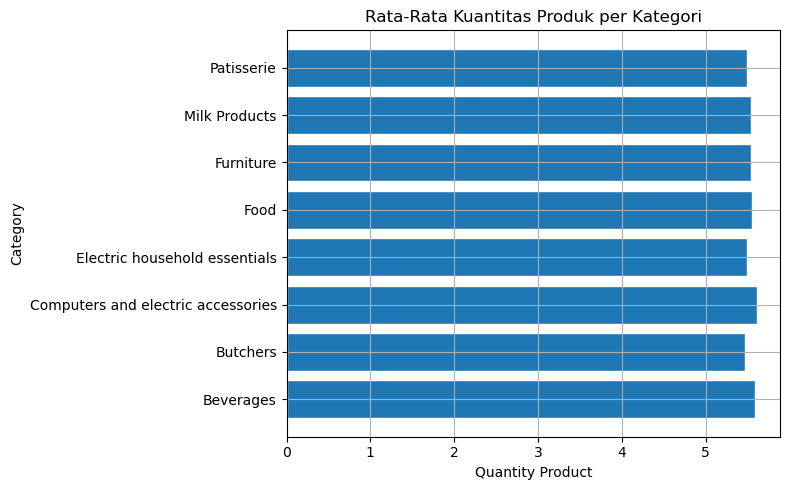

In [253]:
plt.figure(figsize=(8, 5))
plt.barh(category_average_quantity.index, category_average_quantity.values, edgecolor="white")
plt.title("Rata-Rata Kuantitas Produk per Kategori")
plt.xlabel("Quantity Product")
plt.ylabel("Category")
plt.tight_layout()
plt.grid(True)

## 5. Total Pendapatan per Metode Pembayaran
Tujuan Agregasi: Untuk membandingkan total nilai uang (bukan hanya jumlah transaksi) yang masuk dari setiap metode pembayaran. Ini membantu mengidentifikasi metode pembayaran mana yang digunakan untuk transaksi bernilai lebih tinggi

- Cash menjadi metode pembayaran dengan total nilai transaksi tertinggi, yaitu Rp513.676,0. Hal ini menunjukkan bahwa transaksi bernilai besar masih banyak dilakukan secara tunai, dibandingkan menggunakan kartu kredit atau dompet digital.

In [254]:
payment_method_revenue = df.groupby("Payment Method")["Total Spent"].agg("sum")
payment_method_revenue

Payment Method
Cash              513676.0
Credit Card       481135.0
Digital Wallet    478187.5
Name: Total Spent, dtype: float64

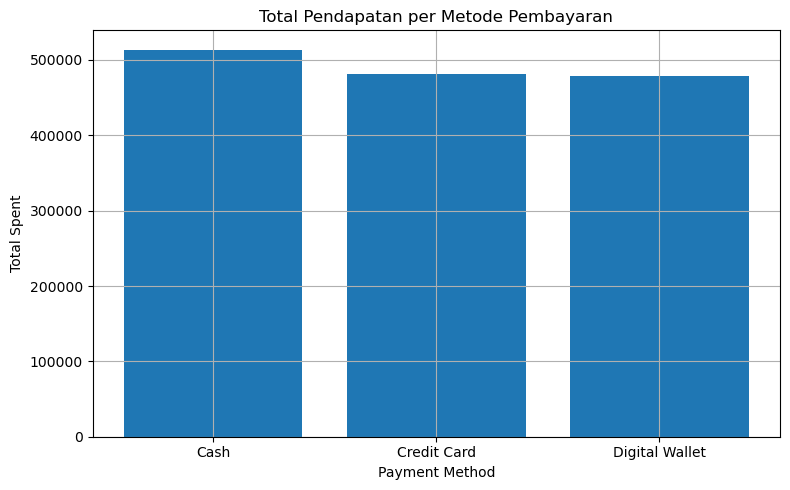

In [255]:
plt.figure(figsize=(8, 5))
plt.bar(payment_method_revenue.index, payment_method_revenue.values)
plt.title("Total Pendapatan per Metode Pembayaran")
plt.xlabel("Payment Method")
plt.ylabel("Total Spent")
plt.tight_layout()
plt.grid(True)

## Deteksi dan tangani outlier

In [256]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11362.000000,11362.000000,11362.000000
mean,23.356847,5.535029,129.642537
std,10.736030,2.855166,94.662368
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,52.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [257]:
df_numerical = df.select_dtypes(include=["float64", "int64"]).columns.to_list()

In [258]:
def remove_outlier (df, columns, x):
    df_clean = df.copy()
    for cols in columns:
        Q1 = df_clean[cols].quantile(0.25)
        Q3 = df_clean[cols].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - x * IQR
        upper_bound = Q3 + x * IQR
        df_clean = df_clean[(df_clean[cols] >= lower_bound) & (df_clean[cols] <= upper_bound)]
    return df_clean

In [259]:
df_no_outlier = remove_outlier(df, df_numerical, 1.5)
df_no_outlier.describe()

,Price Per Unit,Quantity,Total Spent
count,11306.000000,11306.000000,11306.000000
mean,23.269459,5.512913,128.253892
std,10.690356,2.844839,92.812029
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,32.000000,8.000000,190.000000
max,41.000000,10.000000,395.000000


In [260]:
df_no_outlier.sample(10)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
4388,TXN_5502229,CUST_07,Butchers,Item_12_BUT,21.5,10.0,215.0,Cash,Online,2024-10-13,False
5679,TXN_8887502,CUST_21,Food,Item_11_FOOD,20.0,8.0,160.0,Digital Wallet,Online,2023-04-01,True
8864,TXN_1481703,CUST_04,Food,Item_5_FOOD,11.0,5.0,55.0,Credit Card,Online,2022-01-20,False
7996,TXN_2685384,CUST_23,Beverages,Item_8_BEV,15.5,3.0,46.5,Credit Card,In-store,2022-08-30,True
5767,TXN_9799219,CUST_22,Electric household essentials,Item_20_EHE,33.5,5.0,167.5,Credit Card,Online,2024-08-18,False
11149,TXN_9708800,CUST_03,Patisserie,Item_3_PAT,8.0,1.0,8.0,Credit Card,Online,2022-03-18,False
2758,TXN_9385722,CUST_25,Food,Item_14_FOOD,24.5,10.0,245.0,Credit Card,In-store,2023-01-30,False
2996,TXN_7332563,CUST_13,Food,Item_13_FOOD,23.0,2.0,46.0,Cash,In-store,2024-03-05,False
448,TXN_3791514,CUST_16,Patisserie,Item_4_PAT,9.5,2.0,19.0,Digital Wallet,Online,2023-01-08,False
5776,TXN_5751953,CUST_20,Food,Item_12_FOOD,21.5,4.0,86.0,Credit Card,In-store,2023-06-09,False


## Normalisasi menggunakan `StandardScaler()`

In [261]:
from sklearn.preprocessing import StandardScaler

In [262]:
std = StandardScaler()

In [263]:
df_std_scaler = df_no_outlier.copy()

In [264]:
df_std_scaler[df_numerical] = std.fit_transform(df_no_outlier[df_numerical])

In [265]:
df_std_scaler.describe()

,Price Per Unit,Quantity,Total Spent
count,1.130600e+04,1.130600e+04,1.130600e+04
mean,1.256930e-17,1.305636e-16,-1.238076e-16
std,1.000044e+00,1.000044e+00,1.000044e+00
min,-1.709042e+00,-1.586421e+00,-1.328054e+00
25%,-8.671244e-01,-8.833626e-01,-8.324062e-01
50%,-2.520689e-02,1.712252e-01,-2.128470e-01
75%,8.167106e-01,8.742837e-01,6.653107e-01
max,1.658628e+00,1.577342e+00,2.874174e+00
